In [2]:
import pandas as pd #dataframe manipulation
import numpy as np #linear algebra

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:/Users/Admin/Downloads/Mobile Classification.csv")
data.head()

,battery_power,dual_sim,fc_megapixel,four_g,int_memory,n_cores,price_range
0,842,0,1,0,7,2,1
1,1021,1,0,1,53,3,2
2,563,1,2,1,41,5,2
3,615,0,0,0,10,6,2
4,1821,0,13,1,44,2,1


In [4]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,battery_power,dual_sim,fc_megapixel,four_g,int_memory,n_cores,price_range
0,0.999961,0.000000,0.001188,0.000000,0.008313,0.002375,0.001188
1,0.998648,0.000978,0.000000,0.000978,0.051840,0.002934,0.001956
2,0.997304,0.001771,0.003543,0.001771,0.072628,0.008857,0.003543
3,0.999815,0.000000,0.000000,0.000000,0.016257,0.009754,0.003251
4,0.999682,0.000000,0.007137,0.000549,0.024155,0.001098,0.000549


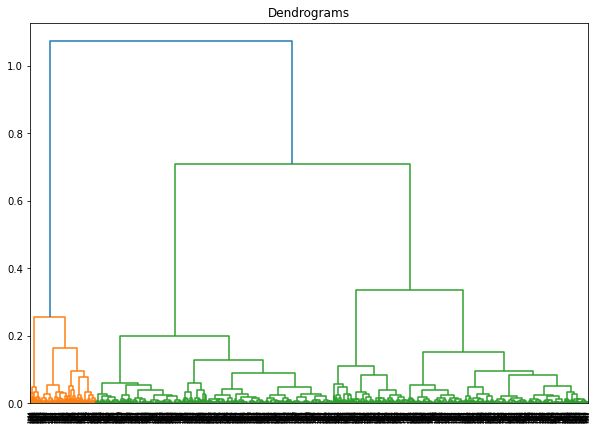

In [5]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([2, 0, 1, ..., 2, 0, 1], dtype=int64)

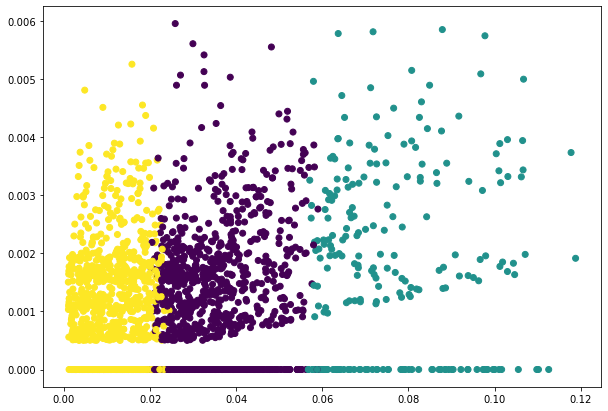

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['int_memory'], data_scaled['price_range'], c=cluster.labels_)
